In [1]:
import numpy as np
from numpy import float64
import matplotlib.pyplot as plt

In [2]:
file_path = "./data/ServerMachineDataset/train/machine-1-1.txt"
raw_series = np.loadtxt(file_path, dtype=float64, delimiter=",")
raw_series

array([[0.032258, 0.039195, 0.027871, ..., 0.034747, 0.      , 0.      ],
       [0.043011, 0.048729, 0.033445, ..., 0.035833, 0.      , 0.      ],
       [0.043011, 0.034958, 0.03233 , ..., 0.033082, 0.      , 0.      ],
       ...,
       [0.086022, 0.065678, 0.073579, ..., 0.064934, 0.      , 0.      ],
       [0.086022, 0.056144, 0.068004, ..., 0.067178, 0.      , 0.      ],
       [0.075269, 0.081568, 0.072464, ..., 0.065079, 0.      , 0.      ]],
      shape=(28479, 38))

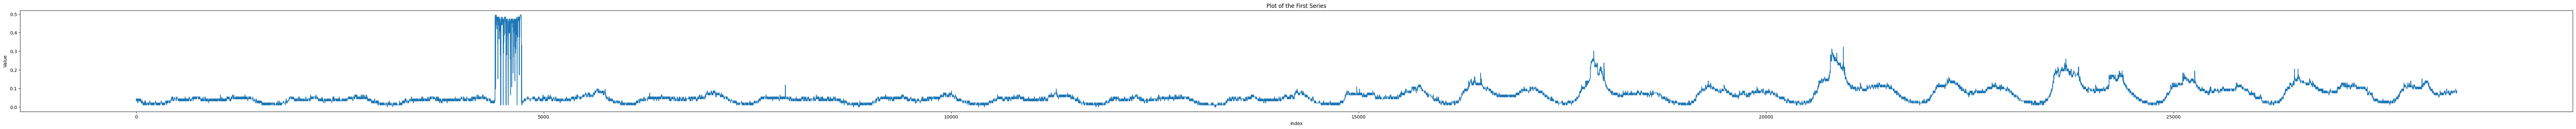

In [3]:
plt.figure(figsize=(100, 4))
plt.plot(raw_series[:, 0])
plt.title("Plot of the First Series")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

In [4]:
def pool_series(series, window_size):
    """
    Pools the given series by averaging over non-overlapping windows of the specified size,
    then replicates the pooled values to match the original size.

    Args:
        series (np.ndarray): The input 1D array to be pooled.
        window_size (int): The window size for pooling.

    Returns:
        np.ndarray: The pooled and replicated series with the same length as the original.
    """
    num_windows = len(series) // window_size
    pooled = np.mean(
        series[: num_windows * window_size].reshape(-1, window_size), axis=1
    )
    replicated = np.repeat(pooled, window_size)
    # If the original length is not a multiple of window_size, append the remaining elements (optional)
    if num_windows * window_size < len(series):
        # Optionally, append the last few elements without pooling (or repeat the last pooled value instead)
        replicated = np.concatenate(
            [replicated, np.full(len(series) - num_windows * window_size, pooled[-1])]
        )
    return replicated

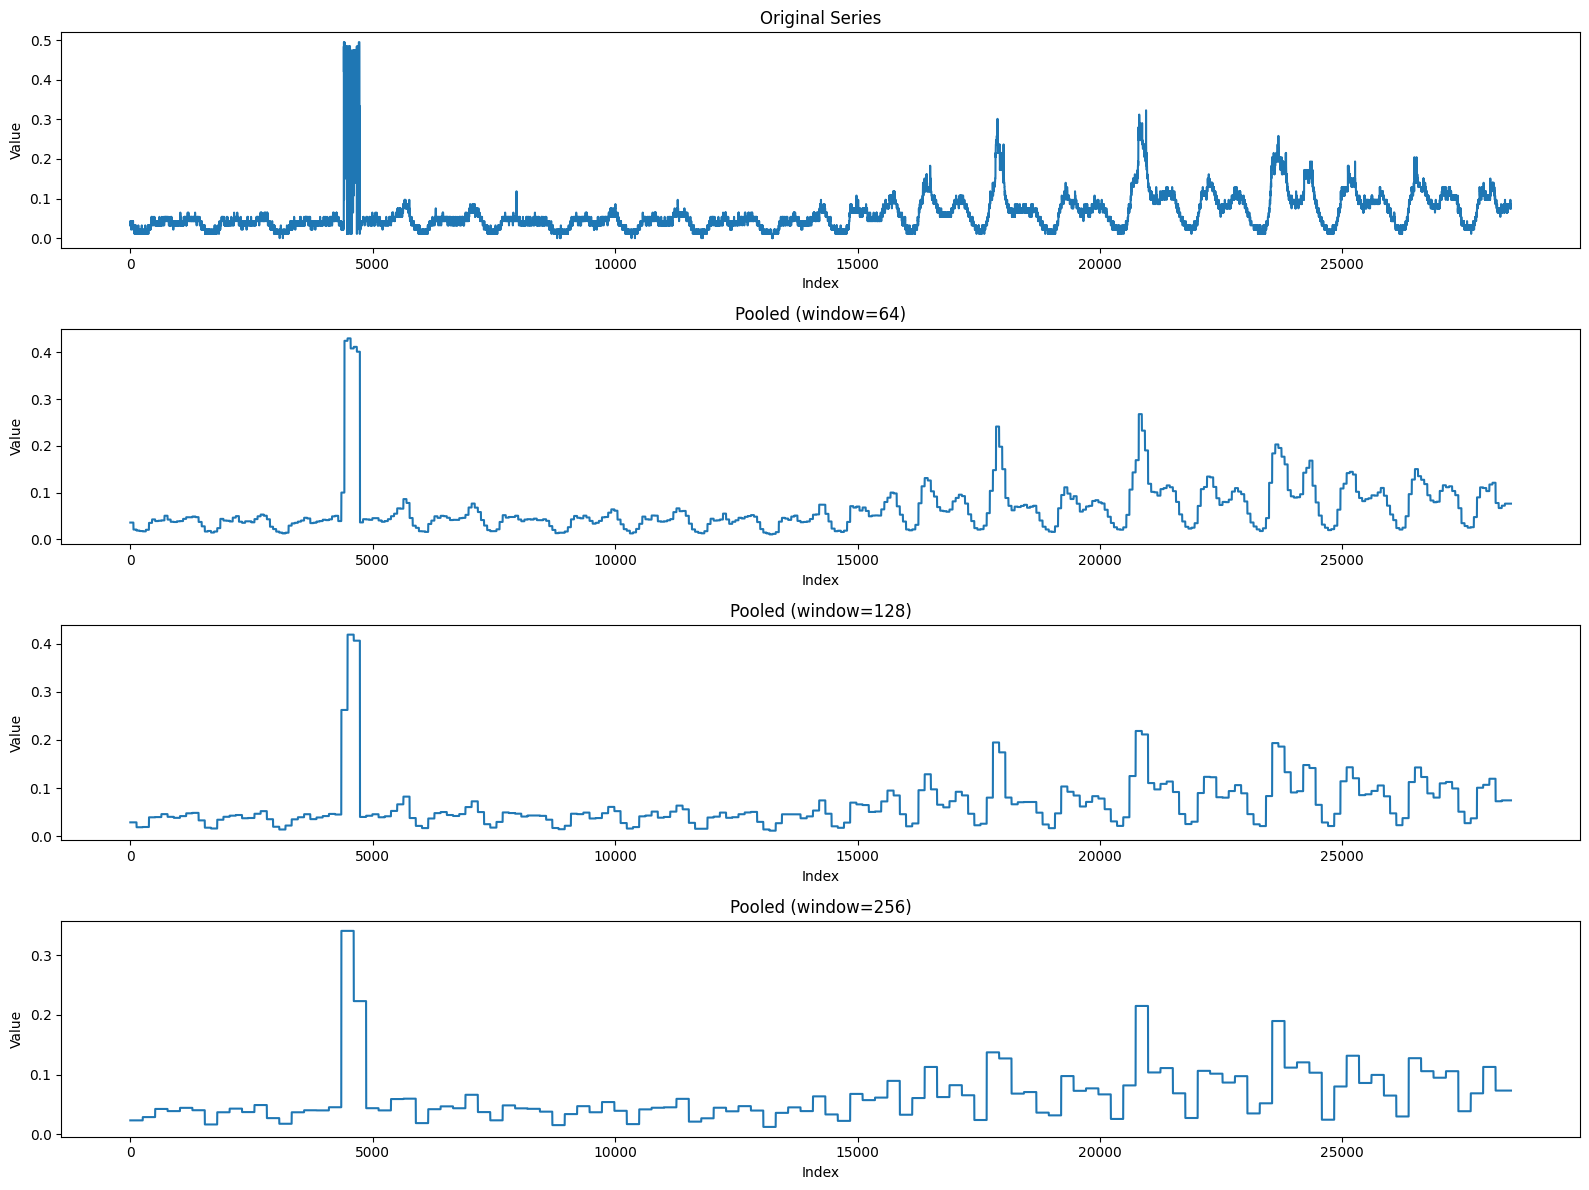

In [5]:
window_sizes = [64, 128, 256]
original_series = raw_series[:, 0]

num_plots = len(window_sizes) + 1
fig, axes = plt.subplots(num_plots, 1, figsize=(16, 3 * num_plots))

# Plot original series in the first row
axes[0].plot(original_series)
axes[0].set_title("Original Series")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Value")

# Plot each pooled series in its own row
for i, w in enumerate(window_sizes):
    pooled = pool_series(original_series, w)
    axes[i + 1].plot(pooled)
    axes[i + 1].set_title(f"Pooled (window={w})")
    axes[i + 1].set_xlabel("Index")
    axes[i + 1].set_ylabel("Value")

plt.tight_layout()
plt.show()